In [ ]:
from sklearn.datasets import make_classification

# weights=[0.90] makes a imbalaced dataset
X, y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [2]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [3]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

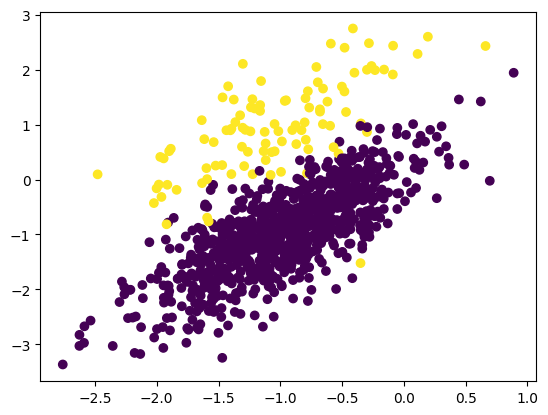

In [4]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [7]:
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')
print(f'Number of "0s": {len(y[y==0])} | Number of "1s": {len(y[y==1])}')

Shape of X: (1800, 2)
Shape of Y: (1800,)
Number of "0s": 900 | Number of "1s": 900


In [8]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

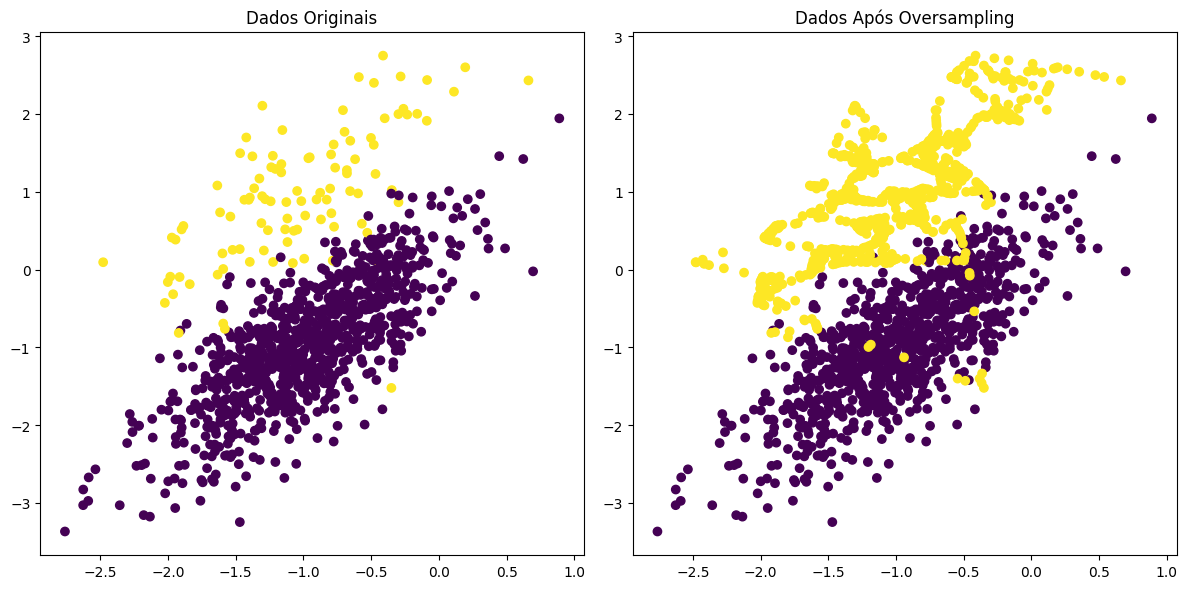

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primeiro gráfico
axes[0].scatter(final_df['f1'], final_df['f2'], c=final_df['target'])
axes[0].set_title('Dados Originais')

# Segundo gráfico
axes[1].scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])
axes[1].set_title('Dados Após Oversampling')

plt.tight_layout()
plt.show()